### Codio Activity 4.6: Data Cleaning

**Expected Time: 120 Minutes**

**Total Points: 40**

This assignment focuses on making decisions with a somewhat dirty dataset.  From datatype conversion, to object removal and cleaning, to missing value handling, cleaning data will be a regular activity while working with data in the wild.  The dataset comes from kaggle [here](https://www.kaggle.com/shansh8/companies-info-wikipedia-2021), and represents information on businesses pulled from [dbpedia](http://dbpedia.org) pertaining to business indicators from a variety of international companies.


#### Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)
- [Problem 6](#Problem-6)
- [Problem 7](#Problem-7)
- [Problem 8](#Problem-8)
- [Problem 9](#Problem-9)


![](images/dbpedia.png)

### Load and Explore the Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
df = pd.read_csv('data/biz.zip', compression = 'zip')

In [8]:
df.head()

,a,name,type,foundation,location,products,sector,employee,assets,equity,revenue,profit
0,http://dbpedia.org/resource/Deutsche_EuroShop,Deutsche EuroShop AG,http://dbpedia.org/resource/Aktiengesellschaft,1999,http://dbpedia.org/resource/Germany,Investment in shopping centers,http://dbpedia.org/resource/Real_property,4,2.96E+09,1.25E+09,2.24E+08,8.04E+07
1,http://dbpedia.org/resource/Deutsche_EuroShop,Deutsche EuroShop AG,http://dbpedia.org/resource/Aktiengesellschaft,1999,http://dbpedia.org/resource/Hamburg,Investment in shopping centers,http://dbpedia.org/resource/Real_property,4,2.96E+09,1.25E+09,2.24E+08,8.04E+07
2,http://dbpedia.org/resource/Industry_of_Machin...,Industry of Machinery and Tractors,http://dbpedia.org/resource/Društvo_sa_ogranič...,8/12/1996,http://dbpedia.org/resource/Belgrade,http://dbpedia.org/resource/Tractors,http://dbpedia.org/resource/Agribusiness,4,4.65E+07,0,30000,-€0.47 million
3,http://dbpedia.org/resource/Industry_of_Machin...,Industry of Machinery and Tractors,http://dbpedia.org/resource/Društvo_sa_ogranič...,8/12/1996,http://dbpedia.org/resource/Serbia,http://dbpedia.org/resource/Agricultural_machi...,http://dbpedia.org/resource/Agribusiness,4,4.65E+07,0,30000,-€0.47 million
4,http://dbpedia.org/resource/Industry_of_Machin...,Industry of Machinery and Tractors,http://dbpedia.org/resource/Društvo_sa_ogranič...,8/12/1996,http://dbpedia.org/resource/Belgrade,http://dbpedia.org/resource/Agricultural_machi...,http://dbpedia.org/resource/Agribusiness,4,4.65E+07,0,30000,-€0.47 million


In [ ]:
df.info()

[Back to top](#Index:) 

### Problem 1

#### Plot of Missing Data

**0 Points**

Create a barplot using `matplotlib` with the $x$-axis representing the columns and the $y$-axis representing the count of missing values. Sort these values from least to greatest.  Save your plot in the `results` folder as `missing_plot.png`.  

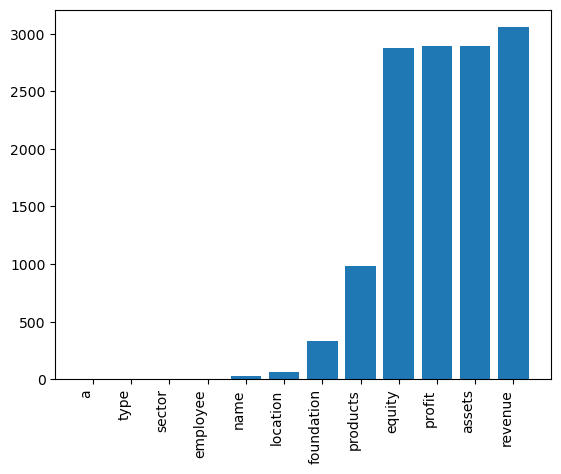

In [28]:
### GRADED

# YOUR CODE HERE
missing_values = df.isnull().sum().sort_values()
plt.bar(missing_values.index, missing_values)
plt.xticks(rotation=90, ha='right')

plt.savefig('./images/missing_plot.png')
plt.show()

[Back to top](#Index:) 

### Problem 2

#### `name` column

**5 Points**

The column `name` has 31 missing values.

Subset the data to examine these observations where `name` is missing. Assign the result as a DataFrame to `ans2` below.  

In [40]:
### GRADED

ans2 = None

# YOUR CODE HERE
ans2 = df[df['name'].isnull()]

# Answer check
print(type(ans2))
print(ans2.shape)
ans2.head()

(31, 12)
<class 'pandas.core.frame.DataFrame'>


,a,name,type,foundation,location,products,sector,employee,assets,equity,revenue,profit
3906,http://dbpedia.org/resource/Royal_Canadian_Mint,NaN,http://dbpedia.org/resource/Crown_corporations...,1/2/1908,520,http://dbpedia.org/resource/Coins,http://dbpedia.org/resource/Mint_(facility),1280,4.44E+08,1.85E+08,"$2,641.4million",2.45E+07
3909,http://dbpedia.org/resource/Royal_Canadian_Mint,NaN,http://dbpedia.org/resource/Crown_corporations...,1/2/1908,"Ottawa, Ontario, Canada",http://dbpedia.org/resource/Coins,http://dbpedia.org/resource/Mint_(facility),1280,4.44E+08,1.85E+08,"$2,641.4million",2.45E+07
4861,http://dbpedia.org/resource/Bulgarian_Postbank,NaN,http://dbpedia.org/resource/Commercial_bank,1991,http://dbpedia.org/resource/Bulgaria,http://dbpedia.org/resource/Asset_management,http://dbpedia.org/resource/Financial_services,3000,6.82E+09,1.15E+09,3.05E+08,1.20E+08
4862,http://dbpedia.org/resource/Bulgarian_Postbank,NaN,http://dbpedia.org/resource/Commercial_bank,1991,http://dbpedia.org/resource/Bulgaria,http://dbpedia.org/resource/Factoring_(finance),http://dbpedia.org/resource/Financial_services,3000,6.82E+09,1.15E+09,3.05E+08,1.20E+08
4863,http://dbpedia.org/resource/Bulgarian_Postbank,NaN,http://dbpedia.org/resource/Commercial_bank,1991,http://dbpedia.org/resource/Bulgaria,http://dbpedia.org/resource/Investment_banking,http://dbpedia.org/resource/Financial_services,3000,6.82E+09,1.15E+09,3.05E+08,1.20E+08


[Back to top](#Index:) 

### Problem 3

### Filling Missing Values in `name`

**5 Points**

Examining the rows missing values in names shows that in the adjacent `a` column, the end of the url contains what can stand in as a name.  Using the `split` string method on the column `a` to split the URL by `/`.  

Assign your split url's as a series to `ans3` below.

This series will be a collection of lists:

```python
0       [http:, , dbpedia.org, resource, Deutsche_Euro...
1       [http:, , dbpedia.org, resource, Deutsche_Euro...
2       [http:, , dbpedia.org, resource, Industry_of_M...
3       [http:, , dbpedia.org, resource, Industry_of_M...
4       [http:, , dbpedia.org, resource, Industry_of_M...
         .
         .
         .
```



In [46]:
### GRADED

ans3 = None

# YOUR CODE HERE
ans3 = df['a'].str.split('/')

# Answer check
print(type(ans3))
ans3.head()

<class 'pandas.core.series.Series'>


3906    [http:, , dbpedia.org, resource, Royal_Canadia...
3909    [http:, , dbpedia.org, resource, Royal_Canadia...
4861    [http:, , dbpedia.org, resource, Bulgarian_Pos...
4862    [http:, , dbpedia.org, resource, Bulgarian_Pos...
4863    [http:, , dbpedia.org, resource, Bulgarian_Pos...
Name: a, dtype: object

[Back to top](#Index:) 

### Problem 4

#### Extracting the names

**5 Points**

To extract the last element of this list, use the `.apply` method together with an appropriate `lambda` function to create a series based on the last entry of the above list in each row.  Your results should begin with:

```python
0                        Deutsche_EuroShop
1                        Deutsche_EuroShop
2       Industry_of_Machinery_and_Tractors
3       Industry_of_Machinery_and_Tractors
4       Industry_of_Machinery_and_Tractors
                       ...                
```

Save this series to `ans4` below.

In [52]:
### GRADED

ans4 = None

# YOUR CODE HERE
ans4 = ans3.apply(lambda x: x[-1])

# Answer check
print(type(ans4))
ans4.head()

<class 'pandas.core.series.Series'>


3906    Royal_Canadian_Mint
3909    Royal_Canadian_Mint
4861     Bulgarian_Postbank
4862     Bulgarian_Postbank
4863     Bulgarian_Postbank
Name: a, dtype: object

[Back to top](#Index:) 

### Problem 5

#### Filling the Missing Values in `name` 

**5 Points**

The `.fillna` method can accept a series and fill in the missing values based on the matching indicies.  


Use the series `ans4` you created in Problem 4 to fill in the missing values in the `name` column. 

Overwrite the earlier column and create a DataFrame with no missing values in the `name` column and assign this new DataFrame to `ans5` below.

In [66]:
### GRADED

ans5 = df.copy()

# YOUR CODE HERE
ans5['name'] = ans5['name'].fillna(ans4)

# Answer check
print(type(ans5))
ans5['name'].isnull().sum()

<class 'pandas.core.frame.DataFrame'>


0

[Back to top](#Index:) 

### Problem 6

#### `location` missing values

**5 Points**

Note that the `location` column is still missing data.  The column is supposed to represent the location of the company as a URL in `dbpedia` or in some cases simply the name of the city the company is located in.  


Use the `isnull()` function to count how many missing values ae in the `locatio` columns. Next, use the `value_counts()` function on the `foundation` column.  Assign these counts as a series to `ans6` below.

In [69]:
### GRADED

ans6 = None

# YOUR CODE HERE
ans6 = df[df['location'].isnull()].foundation.value_counts()

# Answer check
print(type(ans6))
ans6.head()

<class 'pandas.core.series.Series'>


foundation
4/8/1980                                   34
Colombo, Sri Lanka                         12
9/7/1933                                    6
New Orleans, Louisiana, U.S.                3
Canonsburg, Pennsylvania, United States     2
Name: count, dtype: int64

[Back to top](#Index:) 

### Problem 7

#### Replace missing `location` with `foundation`

**5 Points**

While not perfect, the values in the `foundation` column could serve as a fill in for the missing values in `location`.  Replace the missing values in `location` with their corresponding value in `foundation`.  Assign the series with the value filled for `location` to `ans7` below.

In [73]:
### GRADED

ans7 = None

# YOUR CODE HERE
ans7 = df['location'].fillna(df[df['location'].isnull()]['foundation'])

# Answer check
print(type(ans7))
ans7

<class 'pandas.core.series.Series'>


0        http://dbpedia.org/resource/Germany
1        http://dbpedia.org/resource/Hamburg
2       http://dbpedia.org/resource/Belgrade
3         http://dbpedia.org/resource/Serbia
4       http://dbpedia.org/resource/Belgrade
                        ...                 
9995                     London, England, UK
9996                     London, England, UK
9997                     London, England, UK
9998                     London, England, UK
9999                     London, England, UK
Name: location, Length: 10000, dtype: object

[Back to top](#Index:) 

### Problem 8

#### Drop rows missing revenue and profit

**5 Points**


Note that the `revenue` and `profit` columns do not have all their values.  


Use the function `dropna()` on `df` to select the non-null entries in the `subset` with columns `revenue` and `profit`.  

Assign you answer as a DataFrame to `ans8` below.

In [75]:
### GRADED

ans8 = None

# YOUR CODE HERE
ans8 = df.dropna(subset = ['revenue', 'profit'])

# Answer check
print(type(ans8))
ans8.shape

<class 'pandas.core.frame.DataFrame'>


(5204, 12)

[Back to top](#Index:) 

### Problem 9

#### How many rows were lost?

**5 Points**

Compare the shape of the original dataset to your solution in 8.  How many rows were lost dropping the data?  Assign your answer as an integer to `ans9` below.

In [79]:
### GRADED

ans9 = None

# YOUR CODE HERE
ans9 = df.shape[0] - ans8.shape[0]

# Answer check
print(type(ans9))
ans9

10000
5204
<class 'int'>


4796

Note that you've lost almost half of our data dropping missing revenue and profit.  Perhaps a different approach should be considered!  Take some time and examine other missing data in our dataset and some strategies for dealing with it.  If it is possible to keep observations do so.